In [1]:
import pandas as pd

df = pd.read_csv('/home/artificialvira/Projects/help/sundar/data/data.csv', encoding='ISO-8859-1', parse_dates=['InvoiceDate'])
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [2]:
df = df.dropna(subset=['CustomerID'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [3]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Date'] = df['InvoiceDate'].dt.date
daily_revenue = df.groupby('Date')['Revenue'].sum().reset_index()


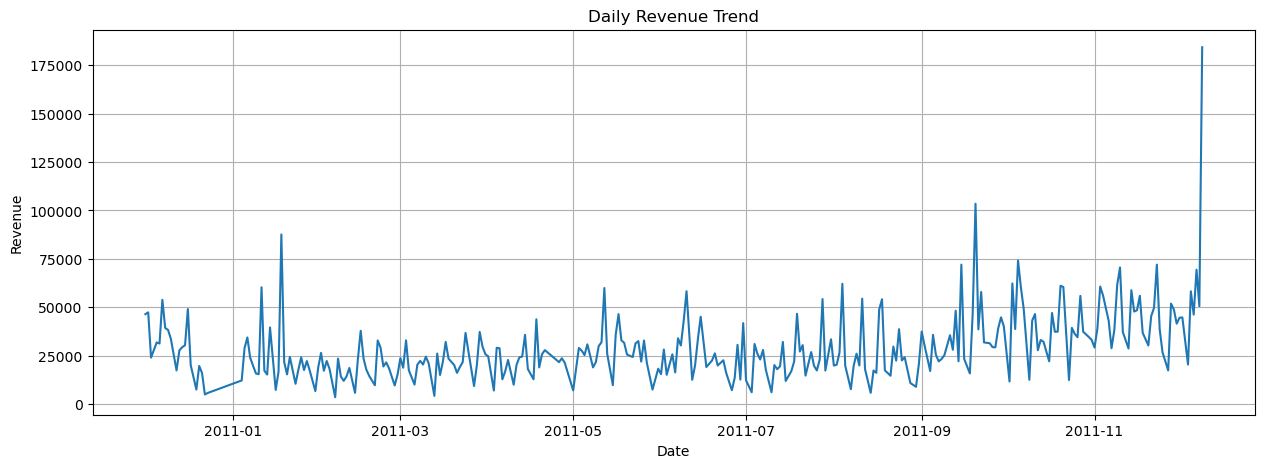

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'])
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid()


/home/artificialvira/miniconda3/envs/dev/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:05:53 - cmdstanpy - INFO - Chain [1] start processing
14:05:53 - cmdstanpy - INFO - Chain [1] done processing


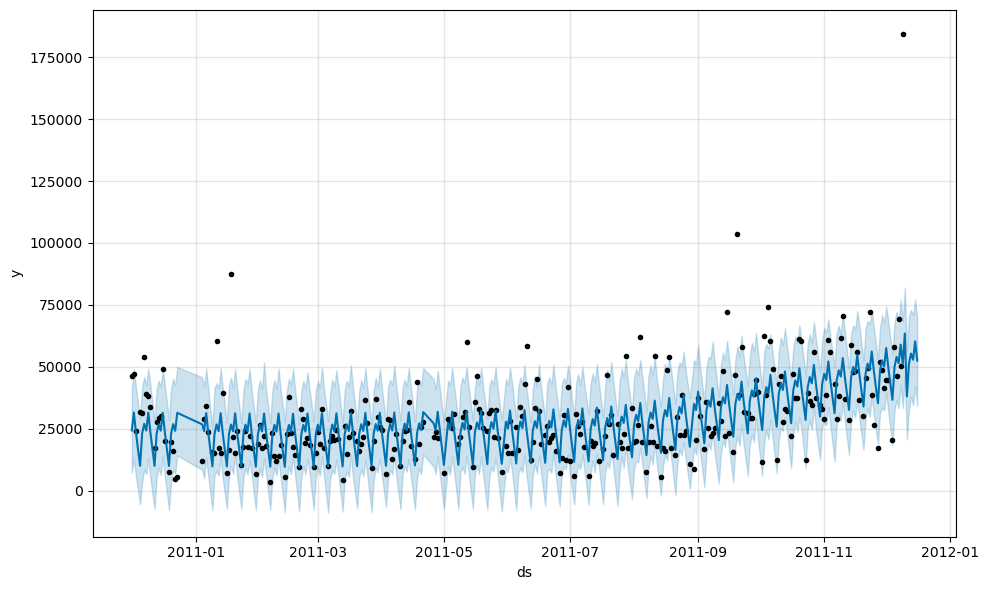

In [5]:
from prophet import Prophet

df_prophet = daily_revenue.rename(columns={'Date': 'ds', 'Revenue': 'y'})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

fig = model.plot(forecast)
fig.savefig('/home/artificialvira/Projects/help/sundar/outputs/forecast_plot.png')
